<a href="https://colab.research.google.com/github/cyamize/ROC_Curve/blob/main/ROC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [4]:
# ROC Curve function

def roc_curve_fig (fpr, tpr):
  #false positive rate, true positive rate의 약자
  plt.plot(fpr, tpr, color = 'yellow', label='ROC')
  plt.plot([0,1],[0,1], color='darkblue', linestyle = '--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC CURVE')
  plt.legend()
  plt.show()

In [6]:
# # of sample = 100

data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

In [7]:
train_X, test_X, train_y, test_y = train_test_split(data_X, class_label, test_size = 0.2, random_state=1)

In [9]:
# model 생성

model = RandomForestClassifier()

model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
# 모델 예측

prob=model.predict_proba(test_X)

In [11]:
prob[:, 1] # positive class만 가져온다는 의미

array([0.05, 0.9 , 0.04, 0.05, 0.97, 0.78, 0.75, 0.94, 0.9 , 0.13, 0.83,
       0.94, 0.04, 0.76, 0.83, 0.07, 0.92, 0.06, 0.9 , 0.02, 0.05, 0.2 ,
       0.87, 0.83, 0.85, 0.81, 0.02, 0.78, 0.87, 0.85, 0.02, 0.13, 0.81,
       0.76, 0.74, 0.05, 0.01, 0.16, 0.93, 0.03, 0.  , 0.72, 0.01, 0.26,
       0.79, 0.02, 0.77, 0.91, 0.8 , 0.05, 0.02, 0.67, 0.05, 0.04, 0.08,
       0.05, 0.79, 0.94, 0.15, 0.06, 0.52, 0.02, 0.96, 0.19, 0.12, 0.3 ,
       0.05, 0.36, 0.85, 0.52, 0.93, 0.02, 0.86, 0.04, 0.04, 0.97, 0.04,
       0.99, 0.91, 0.91, 0.07, 0.06, 0.81, 0.92, 0.24, 0.8 , 0.02, 0.03,
       0.61, 0.6 , 0.85, 0.92, 0.43, 0.03, 0.92, 0.21, 0.94, 0.83, 0.04,
       0.  , 0.84, 0.01, 0.84, 0.07, 0.01, 0.95, 0.08, 0.77, 0.54, 0.79,
       0.85, 0.02, 0.85, 0.83, 0.98, 0.95, 0.89, 0.03, 0.95, 0.03, 0.03,
       0.04, 0.02, 0.92, 0.77, 0.06, 0.79, 0.93, 0.85, 0.95, 0.88, 0.01,
       0.92, 0.71, 0.38, 0.72, 0.06, 0.84, 0.9 , 0.78, 0.86, 0.68, 0.05,
       0.02, 0.83, 0.06, 0.88, 0.22, 0.09, 0.82, 0.

In [12]:
probs = prob[:, 1] # positive class만 가져온다는 의미

In [13]:
# AUC

auc = roc_auc_score(test_y, probs)

In [14]:
fpr, tpr, thresholds = roc_curve(test_y, probs)

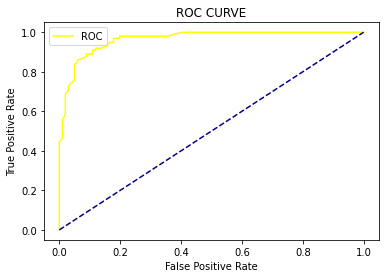

In [17]:
roc_curve_fig(fpr, tpr)

In [18]:
auc

0.9652965296529653